<a href="https://colab.research.google.com/github/anshabrol/Algozenith-essential-ml/blob/main/clustering_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skeleton Code and TASKS

In [ ]:
# Dataset: Simple 2D points with more data
data = [
    [2, 3], [3, 3], [3, 4], [5, 8], [8, 8], [8, 9], [1, 0], [0, 1],
    [5, 4], [6, 4], [7, 5], [9, 6], [1, 3], [2, 2], [7, 8], [9, 9],
    [10, 10], [8, 7], [6, 6], [2, 1], [4, 3], [5, 2], [6, 1], [7, 3],
    [8, 2], [9, 1], [10, 3], [8, 5], [6, 7], [3, 9], [2, 8]
]

import random
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Args:
    point1, point2: Lists of coordinates [x, y]

    Returns:
    float: Euclidean distance
    """
    # TASK 1: Implement the Euclidean distance formula
    distance =
    return distance

def initialize_centroids(data, k):
    """
    Initialize centroids using k-means++ algorithm.

    Args:
    data: List of data points
    k: Number of clusters

    Returns:
    centroids: Initialized centroids
    """
    centroids = []
    # Randomly choose the first centroid from the data points
    centroids.append(random.choice(data))

    while len(centroids) < k:
        distances = []
        # TASK 2: Calculate the distance from each point to the nearest centroid


        # TASK 3: Calculate the probability distribution for choosing the next centroid


        # TASK 4: Choose the next centroid based on the cumulative probability distribution


    return centroids

def kmeans(data, k, max_iters=100):
    """
    Perform k-means clustering.

    Args:
    data: List of data points
    k: Number of clusters
    max_iters: Maximum number of iterations

    Returns:
    centroids: Final centroids
    clusters: List of clusters
    """
    #Initialize centroids using k-means++ algorithm
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]

        #Assign each point to the nearest centroid
        for point in data:
            closest_centroid = min(range(k), key=lambda i: euclidean_distance(point, centroids[i]))
            clusters[closest_centroid].append(point)

        new_centroids = []
        # Calculate the new centroids as the mean of the assigned points
        for cluster in clusters:
            new_centroid = [sum(point[i] for point in cluster) / len(cluster) for i in range(2)]
            new_centroids.append(new_centroid)

        # Check for convergence (if centroids do not change)
        if centroids == new_centroids:
            break

        centroids = new_centroids

    return centroids, clusters

#Set the number of clusters
k = 3

#Perform k-means clustering
centroids, clusters = kmeans(data, k)

#Print the clusters and centroids
for i, cluster in enumerate(clusters):
    print(f'Cluster {i}: {cluster}')

print(f'Centroids: {centroids}')

# Visualization code
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means++ Clustering')
plt.show()


Full Solution Code


Cluster 0: [[2, 3], [3, 3], [3, 4], [1, 0], [0, 1], [1, 3], [2, 2], [2, 1], [4, 3]]
Cluster 1: [[5, 8], [8, 8], [8, 9], [9, 6], [7, 8], [9, 9], [10, 10], [8, 7], [6, 6], [6, 7], [3, 9], [2, 8]]
Cluster 2: [[5, 4], [6, 4], [7, 5], [5, 2], [6, 1], [7, 3], [8, 2], [9, 1], [10, 3], [8, 5]]
Centroids: [[2.0, 2.2222222222222223], [6.75, 7.916666666666667], [7.1, 3.0]]


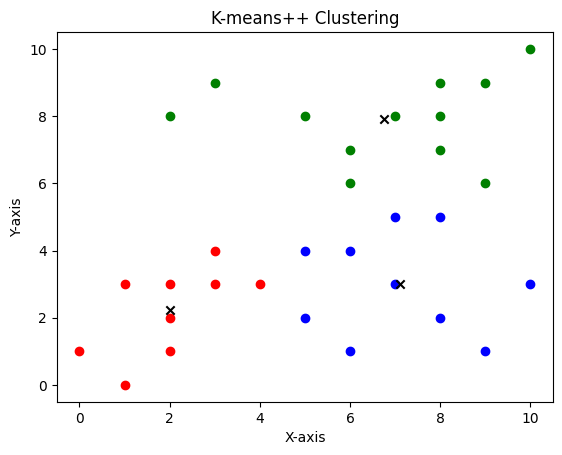

In [ ]:
# Dataset: Simple 2D points with more data
data = [
    [2, 3], [3, 3], [3, 4], [5, 8], [8, 8], [8, 9], [1, 0], [0, 1],
    [5, 4], [6, 4], [7, 5], [9, 6], [1, 3], [2, 2], [7, 8], [9, 9],
    [10, 10], [8, 7], [6, 6], [2, 1], [4, 3], [5, 2], [6, 1], [7, 3],
    [8, 2], [9, 1], [10, 3], [8, 5], [6, 7], [3, 9], [2, 8]
]

import random
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Args:
    point1, point2: Lists of coordinates [x, y]

    Returns:
    float: Euclidean distance
    """
    # Task: Implement the Euclidean distance formula
    distance = ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5
    return distance

def initialize_centroids(data, k):
    """
    Initialize centroids using k-means++ algorithm.

    Args:
    data: List of data points
    k: Number of clusters

    Returns:
    centroids: Initialized centroids
    """
    centroids = []
    # Task: Randomly choose the first centroid from the data points
    centroids.append(random.choice(data))

    while len(centroids) < k:
        distances = []
        # Task: Calculate the distance from each point to the nearest centroid
        for point in data:
            min_distance = min(euclidean_distance(point, centroid) for centroid in centroids)
            distances.append(min_distance)

        # Task: Calculate the probability distribution for choosing the next centroid
        probs = [d / sum(distances) for d in distances]
        cumulative_probs = [sum(probs[:i+1]) for i in range(len(probs))]
        r = random.random()

        # Task: Choose the next centroid based on the cumulative probability distribution
        for i, p in enumerate(cumulative_probs):
            if r < p:
                centroids.append(data[i])
                break

    return centroids

def kmeans(data, k, max_iters=100):
    """
    Perform k-means clustering.

    Args:
    data: List of data points
    k: Number of clusters
    max_iters: Maximum number of iterations

    Returns:
    centroids: Final centroids
    clusters: List of clusters
    """
    # Task: Initialize centroids using k-means++ algorithm
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]

        # Task: Assign each point to the nearest centroid
        for point in data:
            closest_centroid = min(range(k), key=lambda i: euclidean_distance(point, centroids[i]))
            clusters[closest_centroid].append(point)

        new_centroids = []
        # Task: Calculate the new centroids as the mean of the assigned points
        for cluster in clusters:
            new_centroid = [sum(point[i] for point in cluster) / len(cluster) for i in range(2)]
            new_centroids.append(new_centroid)

        # Task: Check for convergence (if centroids do not change)
        if centroids == new_centroids:
            break

        centroids = new_centroids

    return centroids, clusters

# Task: Set the number of clusters
k = 3

# Task: Perform k-means clustering
centroids, clusters = kmeans(data, k)

# Task: Print the clusters and centroids
for i, cluster in enumerate(clusters):
    print(f'Cluster {i}: {cluster}')

print(f'Centroids: {centroids}')

# Visualization code
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means++ Clustering')
plt.show()
